# Exercise: RDataFrame basics

The file `../data/example_file.root` contains a `TTree` dataset (called `"dataset"`) with two scalar columns `a` and `b`.<br>
There is a normal distribution hidden in there, but to display it you have to plot the natural logarithm of `a` only for entries in which `b <= 0.5`.

### Useful links

- [RDataFrame class reference](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
- [RDataFrame tutorials](https://root.cern.ch/doc/master/group__tutorial__dataframe.html)

In [12]:
import ROOT

#f = ROOT.TFile("/uscms_data/d3/dconcion/final_assignment/assignment/example_file.root", "UPDATE")

In [13]:
treename = "dataset"
filename = "/uscms_data/d3/dconcion/final_assignment/assignment/example_file.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [17]:
df1 = df.Filter("b <= 0.5")
log_df = df1.Define("log_a", "log(a)")  # making a new column with the log(a) after the first filter

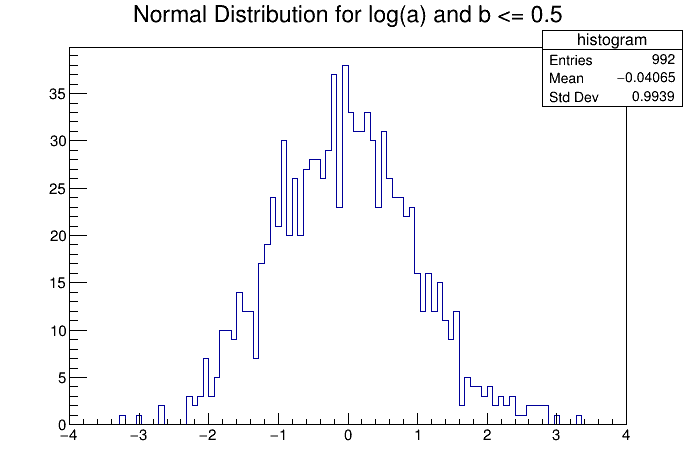

In [22]:
h = log_df.Histo1D(("histogram", "Normal Distribution for log(a) and b <= 0.5", 100, -4, 4), "log_a")
c = ROOT.TCanvas()
h.Draw()
c.Draw()